<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 3: Linear Regression and KNN - Train/Test Split

---

# Introduction

We've discussed overfitting in the context of bias and variance, and we've touched on some techniques, such as regularization, that are used to avoid overfitting (but haven't practiced them yet). In this lesson we'll discuss a fundamental method for avoiding overfitting that is commonly referred to as _train/test split_ validation. 

The idea is similar to something called "cross-validation" — in fact, it is a type of cross-validation — in that we split the data set into two subsets:
* A subset on which to train our model.
* A subset on which to test our model's predictions.

This serves two useful purposes:
* We prevent overfitting by not using all of the data.
* We have some remaining data we can use to evaluate our model.

While this may seem like a relatively simple idea, **there are some caveats** to putting it into practice. For example, if you are not careful, it is easy to take a non-random split. Suppose we have salary data on technical professionals that is composed of 80 percent data from California and 20 percent data from elsewhere and is sorted by state. If we split our data into 80 percent training data and 20 percent testing data, we might inadvertantly select all the California data to train and all the non-California data to test. In this case we've still overfit on our data set because we did not sufficiently randomize the data.

In a situation like this we can use _k-fold cross-validation_, which is the same idea applied to more than two subsets. In particular, we partition our data into $k$ subsets and train on $k-1$ one of them, holding the last slice for testing. We can do this for each of the possible $k-1$ subsets.

# Independent Practice

Ultimately we use a test-training split to compare multiple models on the same data set. This could be comparisons of two linear models or of completely different models on the same data.

For your independent practice, fit three different models on the Boston housing data. For example, you could pick three different subsets of variables, one or more polynomial models, or any other model you'd like. 

### Here's What We Will Be Doing:

* Working with Boston housing data to predict the value of a home
* Create a test-train split of the data.
* Train each of your models on the training data.
* Evaluate each of the models on the test data.
* Rank the models by how well they score on the testing data set.

**Then, try k-folds.**

* Try a few different splits of data for the same models.
* Perform a k-fold cross-validation and use the cross-validation scores to compare your models. Did this change your rankings?

**Be sure to provide interpretation for your results.**

Recall that k-fold cross-validation creates a hold portion of your data set for each iteration of training and validating:

![](http://i.imgur.com/0PFrPXJ.png)

## Linear Regression Use Case

In this given task, you will be asked to model the median home price of various houses across U.S. Census tracts in the city of Boston. This is a probable use case: We are predicting a continuous, numeric output (price) based on a combination of discrete features.

In [1]:
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston

boston = load_boston()

df_X = pd.DataFrame(boston.data,
                 columns=boston.feature_names)
df_y = pd.DataFrame(boston.target,
                 columns=['MEDV'])

print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

### 1. Clean Up Data and Perform Exporatory Data Analysis

Boston data is from scikit-learn, so it ought to be pretty clean, but we should always perform exploratory data analysis.

In [3]:
# Exploratory data analysis.

# Include: total nulls, index, data types, shape, summary statistics, and the number of unique values for each column


In [4]:
# Get a sample of 5 rows to have a quick idea of how the dataframe looks like
df_X.sample(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
326,0.30347,0.0,7.38,0.0,0.493,6.312,28.9,5.4159,5.0,287.0,19.6,396.90,6.15
14,0.63796,0.0,8.14,0.0,0.538,6.096,84.5,4.4619,4.0,307.0,21.0,380.02,10.26
358,5.20177,0.0,18.10,1.0,0.770,6.127,83.4,2.7227,24.0,666.0,20.2,395.43,11.48
31,1.35472,0.0,8.14,0.0,0.538,6.072,100.0,4.1750,4.0,307.0,21.0,376.73,13.04
195,0.01381,80.0,0.46,0.0,0.422,7.875,32.0,5.6484,4.0,255.0,14.4,394.23,2.97


In [5]:
# Check if there are any missing values across any columns
# There are no null values
df_X.isna().sum(axis = 0)

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [6]:
# Get the index of the dataframe
# It appears that this is a standard dataframe range index
df_X.index

RangeIndex(start=0, stop=506, step=1)

In [7]:
# Examine the column types
# All columns are of the float type
df_X.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
dtype: object

In [8]:
# Examine the statistics
df_X.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [9]:
# Get the number of unique values for each column in the dataframe
# It appears that "CHAS" and "RAD" has very few unique values 
# - however from the summary above we can validate that RAD is an ordinal variable and not a nominal one
df_X.nunique()

CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      455
dtype: int64

In [10]:
import seaborn as sns
sns.set()

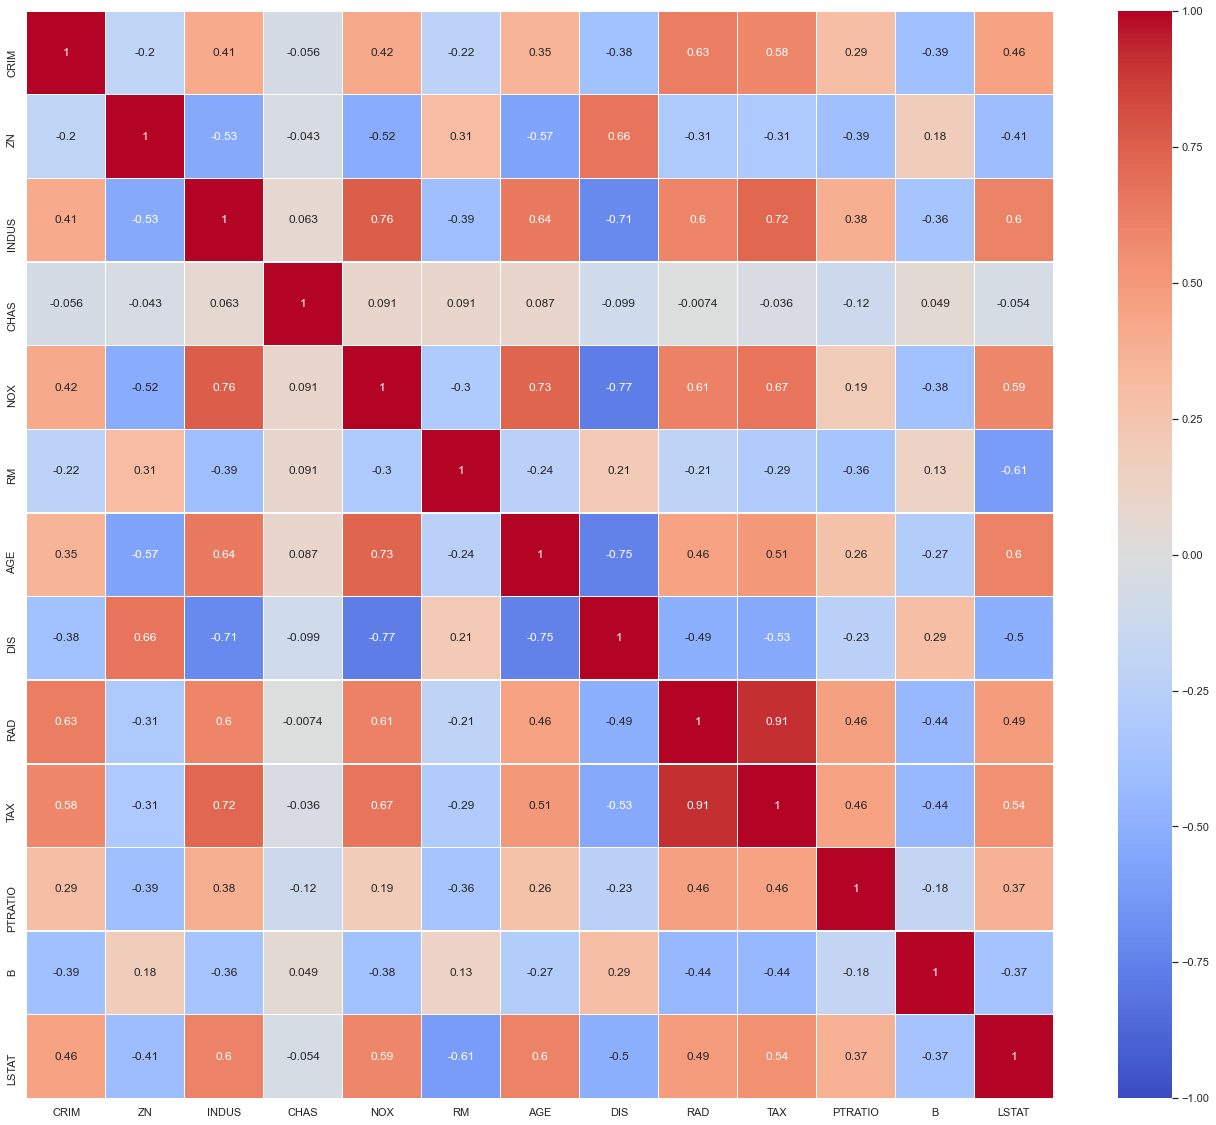

In [11]:
# Visualize correlation matrix using a heat map
# This shows quite a number of variables with a strong positive correlation, such as RAD and TAX
# We might want to avoid picking highly correlated variables
plt.figure(figsize=(23,20))
sns.heatmap(
    df_X.corr(), 
    annot=True, 
    linewidth=.5, 
    cmap="coolwarm",
    vmin=-1,
    vmax=1
)
plt.show()

## Using `scikit-learn` Linear Regression

### 2. Pick 3-4 predictors (i.e. CRIM, ZN, etc...) that you will use to predict our target variable, MEDV.
Score and plot your predictions. What do these results tell us?

## Predictors chosen

Predictors are chosen based on a guess that these predictors are important

* ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
* RM - average number of rooms per dwelling
* CRIM - per capita crime rate by town
* B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

In [12]:
predictors = ["ZN","RM","CRIM","B"]

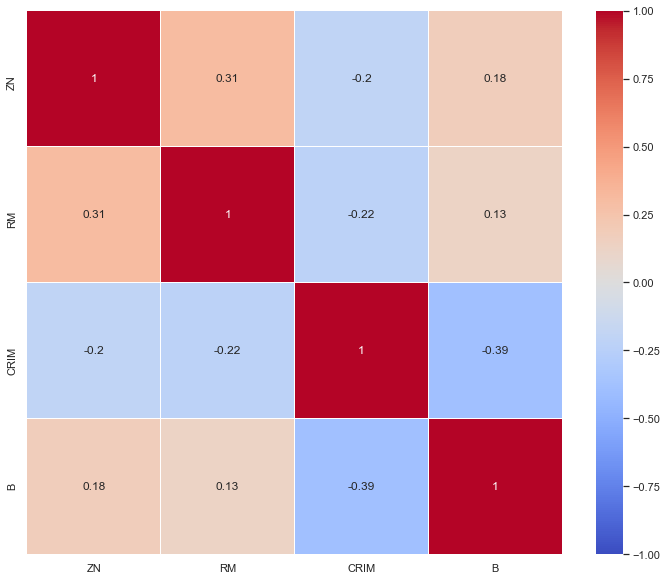

In [13]:
plt.figure(figsize=(12,10))
sns.heatmap(
    df_X[predictors].corr(), 
    annot=True, 
    linewidth=.5, 
    cmap="coolwarm",
    vmin=-1,
    vmax=1
)
plt.show()

### Analysis
* A quick glance at the correlation map shows no single variable being highly correlated to any other variables. This is important as collinearity of variables will distort the linear coefficients and cause small changes in coefficients to have large shifts in the prediction
* Although multicollinearlity is an assumption of linear regression we will assume that there is no multicollinearity for now

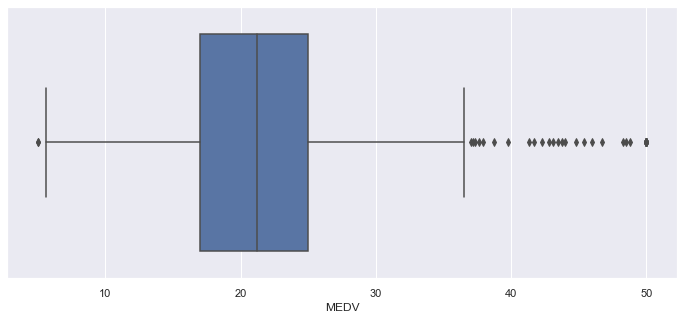

In [14]:
# Take a look at the boxplot for y
plt.figure(figsize=(12,5))
sns.boxplot(x=df_y["MEDV"])
plt.show()

### Analysis
* We see a large number of outliers at around the mark of 38. We will have to take note of these points as these points will likely skew the linear regression line

In [15]:
# Import necessary modules
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error

In [16]:
# Initialise 
scaler = StandardScaler()
linreg = LinearRegression()

In [17]:
# Convert X and y into numpy arrays
X = df_X[predictors].values
y = df_y.values

# Scale X
X = scaler.fit_transform(X)

# Fit y on X
linreg.fit(X, y)

# Get Predicted Y
y_pred = linreg.predict(X)

In [18]:
# Compute Metrics
rmse = mean_squared_error(y, y_pred, squared = False)
r2 = r2_score(y, y_pred)
print(f"RMSE: {rmse:.3f}")
print(f"R2: {r2:.3f}")

RMSE: 5.948
R2: 0.581


In [19]:
# Describe the predicted variable
df_y.describe()

,MEDV
count,506.000000
mean,22.532806
std,9.197104
min,5.000000
25%,17.025000
50%,21.200000
75%,25.000000
max,50.000000


### Analysis

* The RMSE is around 6. When we look at the standard deviation for the label, we can see that it is around 9. This means that the model is on average, 2/3 standard deviation off the actual label. That is not too bad!
* The R2 value is 0.58. This means that it has a decent fit to the data. At the very least we are performing better than the average line (R2 = 0)!

In [20]:
# Show the intercept and coefficient
print(f"Intercept: {linreg.intercept_.item():.3f}")
print("")
pd.DataFrame([{"pred":pred, "coef": coef} for pred, coef in zip(predictors, linreg.coef_[0])])

Intercept: 22.533



,pred,coef
0,ZN,0.996708
1,RM,5.536542
2,CRIM,-1.543561
3,B,1.585472


### Analysis

* The coefficients are generally positive. This means that the predictors ZN, RM and B have a positive correlation with the label Median Home Value. In particular, the average number of rooms per dwelling has a high coefficient of 5.53.
* CRIM has a negative coefficient. The higher the CRIM, the lower the median home value.
* The intercept has a value of 22.533. This means that at the mean of all variables (since the variables are standardised), the predicted median home value is 22.533

In [21]:
# Plot the error terms
errors = (y_pred-y).T[0]
df_errors = pd.DataFrame(
    np.array([np.arange(1, errors.shape[0]+1), y_pred.T[0], errors]).T,
    columns = ["Index","Predicted Value","Error"]
)

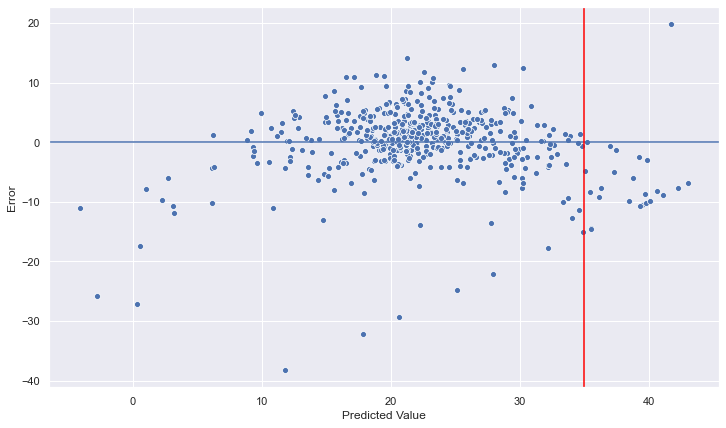

In [22]:
plt.figure(figsize=(12,7))
ax = plt.gca()
sns.scatterplot(data=df_errors, x="Predicted Value", y="Error", ax=ax)
ax.axhline(y=errors.mean())
ax.axvline(x=35, color="red")
plt.show()

### Analysis

* The variance of the error terms are generally constant, except for some values where the predicted value is > 35 (this is the range of the outliers seen in the earlier boxplot)
* This suggests that we may need to have other terms/interaction terms to cater for this specific group

### 3. Try 70/30 and 90/10 train/test splits (70% of the data for training - 30% for testing, then 90% for training - 10% for testing)
Score and plot. How do your metrics change? What does this tell us about the size of training/testing splits?

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
# Convert X and y into numpy arrays
X = df_X[predictors].values
y = df_y.values

In [25]:
def compute_metrics(y, y_pred, print_metrics: bool = True):
    """
    Print RMSE and R2
    """
    # Compute Metrics
    rmse = mean_squared_error(y, y_pred, squared = False)
    r2 = r2_score(y, y_pred)
    
    if print_metrics:
        print(f"RMSE: {rmse:.3f}")
        print(f"R2: {r2:.3f}")
    
    return r2, rmse
    
    
def get_intercept_and_coefficient(lr_model, predictors):
    """
    Returns the intercept and coefficient
    """
    print(f"Intercept: {lr_model.intercept_.item():.3f}")
    print("")
    df_predictors = pd.DataFrame([{"pred":pred, "coef": coef} for pred, coef in zip(predictors, lr_model.coef_[0])])
    display(df_predictors)

def plot_error_terms(
    y: np.array, 
    y_pred: np.array, 
    title: str
):
    """
    Plots the error terms
    """
    # Plot the error terms
    errors = (y_pred-y).T[0]
    df_errors = pd.DataFrame(
        np.array([np.arange(1, errors.shape[0]+1), y_pred.T[0], errors]).T,
        columns = ["Index","Predicted Value","Error"]
    )
    
    plt.figure(figsize=(12,7))
    ax = plt.gca()
    sns.scatterplot(data=df_errors, x="Predicted Value", y="Error", ax=ax)
    ax.axhline(y=errors.mean())
    ax.axvline(x=35, color="red")
    plt.title(title)
    plt.show()
    
def run_linear_regression(
    X: np.array,
    y: np.array,
    predictors: list,
    test_size: float,
    random_state: int = 101,
    display_charts: bool = True
):
    """
    Function to run linear regression
    
    Does the following
    - Train test split
    - Fitting
    - Show RMSE and R2
    - Show coefficients and intercept
    - Plot error terms
    """
    # Initialise 
    scaler = StandardScaler()
    linreg = LinearRegression()
    
    # Split into train and test
    X_train, X_test, y_train, y_test = train_test_split(X, 
                                                        y, 
                                                        test_size = test_size, 
                                                        random_state=random_state
                                                       )
    
    # Scale X
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Fit y on X
    linreg.fit(X_train, y_train)

    # Get Predicted Y
    y_train_pred = linreg.predict(X_train)
    y_test_pred = linreg.predict(X_test)
    
    print("Train Metrics")
    compute_metrics(y_train, y_train_pred)
    print("\nTest Metrics")
    r2, rmse = compute_metrics(y_test, y_test_pred)
    
    if display_charts:
        # Show the intercept and coefficient
        get_intercept_and_coefficient(linreg, predictors)

        plot_error_terms(y_train, y_train_pred, "Train Error Plot")
        plot_error_terms(y_test, y_test_pred, "Test Error Plot")
    
    return r2, rmse

Train Metrics
RMSE: 5.839
R2: 0.557

Test Metrics
RMSE: 6.227
R2: 0.609
Intercept: 21.977



,pred,coef
0,ZN,0.946385
1,RM,5.130849
2,CRIM,-1.532798
3,B,1.526930


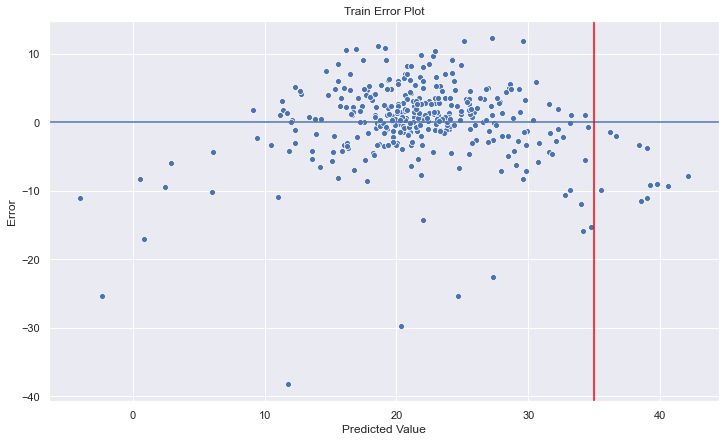

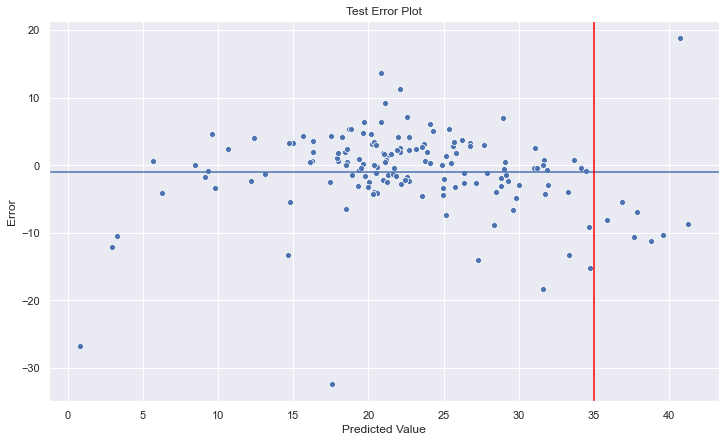

In [26]:
_ = run_linear_regression(X, y, predictors, 0.3)

Train Metrics
RMSE: 5.820
R2: 0.566

Test Metrics
RMSE: 7.066
R2: 0.618
Intercept: 22.184



,pred,coef
0,ZN,0.876740
1,RM,5.230186
2,CRIM,-1.671104
3,B,1.527709


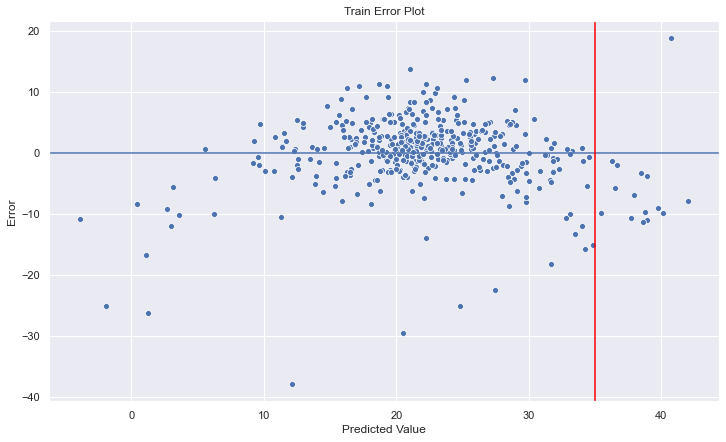

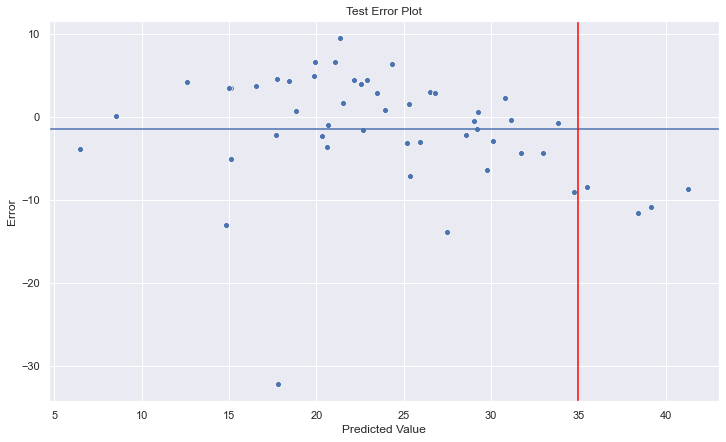

In [27]:
_ = run_linear_regression(X, y, predictors, 0.1)

### Analysis

* The split with a larger test dataset resulted in larger errors
* This is likely due to a larger variance inherent in a smaller dataset.
* As the test set grows in size, the prediction values will likely tend towards the population mean and result in a smaller error

### 4. Use k-fold cross validation varying the number of folds from 5 to 10
What seems optimal? How do your scores change? What is the variance like? Try different folds to get a sense of how this impacts your score. What are the tradeoffs associated with choosing the number of folds?

In [28]:
from sklearn.model_selection import KFold, cross_val_score

In [29]:
rmse_arr = []
r2_arr = []
folds = np.arange(5, 11)

for i in folds:
    rmse_per_i = []
    r2_per_i = []
    for n in range(30):
        kf = KFold(n_splits=i, shuffle=True)
        linreg = LinearRegression()
        r2_per_i.append(cross_val_score(linreg, df_X, df_y, cv=kf, scoring='r2'))

        mse = -1*cross_val_score(linreg, df_X, df_y, cv=kf, scoring='neg_mean_squared_error')
        rmse = np.sqrt(mse)
        rmse_per_i.append(rmse)
        
    rmse_arr.append(rmse_per_i)
    r2_arr.append(r2_per_i)

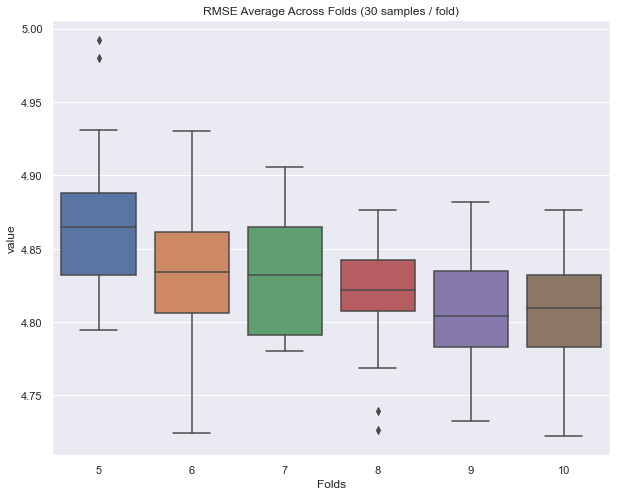

In [30]:
arr = np.array([[i.mean() for i in arr] for arr in rmse_arr])
df = pd.DataFrame(arr.T)
df.columns = folds
df = pd.melt(df, value_vars=folds, var_name="Folds")

# Plot Values
plt.figure(figsize=(10,8))
ax = plt.gca()
sns.boxplot(
    data=df,
    x="Folds",
    y="value", 
    ax=ax
)
plt.title("RMSE Average Across Folds (30 samples / fold)")
plt.show()

In [31]:
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd
f_oneway(*arr)

F_onewayResult(statistic=8.26913191387607, pvalue=4.961043377598905e-07)

In [32]:
# perform Tukey's test
tukey = pairwise_tukeyhsd(endog=df['value'], groups=df['Folds'], alpha=0.05)
print(tukey)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     5      6  -0.0326 0.0276 -0.0629 -0.0022   True
     5      7  -0.0336 0.0205  -0.064 -0.0033   True
     5      8  -0.0469  0.001 -0.0773 -0.0165   True
     5      9  -0.0561  0.001 -0.0864 -0.0257   True
     5     10  -0.0579  0.001 -0.0883 -0.0276   True
     6      7   -0.001    0.9 -0.0314  0.0293  False
     6      8  -0.0143 0.7235 -0.0447   0.016  False
     6      9  -0.0235 0.2303 -0.0538  0.0069  False
     6     10  -0.0254 0.1599 -0.0557   0.005  False
     7      8  -0.0133 0.7803 -0.0436  0.0171  False
     7      9  -0.0224 0.2774 -0.0528  0.0079  False
     7     10  -0.0243 0.1967 -0.0547  0.0061  False
     8      9  -0.0091    0.9 -0.0395  0.0212  False
     8     10   -0.011    0.9 -0.0414  0.0193  False
     9     10  -0.0019    0.9 -0.0322  0.0285  False
----------------------------------------------

### Analysis

* The RMSE values show a decreasing trend over time.
* We perform further statistical checks to ascertain if this trend is indeed statistically significant
* Using F-Test, we can reject H0 that the RSME values are the same at a 1% level of significance
* Using pairwise tukey-cramer procedure [https://www.statology.org/tukey-test-python/] we can see that a level of significance of 5%, the RSME values of fold 10 (with the lowest mean RSME value) is statistically different from that of fold 5, 6 and 7, but is not statistically different from folds 8 and 9.
* Using a fold larger than 10 may yield a lower RSME that is statistically different @ 5%

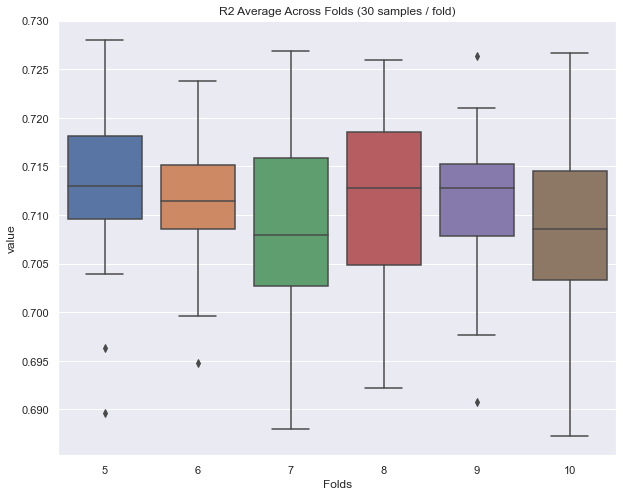

In [33]:
arr = np.array([[i.mean() for i in arr] for arr in r2_arr])
df = pd.DataFrame(arr.T)
df.columns = folds
df = pd.melt(df, value_vars=folds, var_name="Folds")

# Plot Values
plt.figure(figsize=(10,8))
ax = plt.gca()
sns.boxplot(
    data=df,
    x="Folds",
    y="value", 
    ax=ax
)
plt.title("R2 Average Across Folds (30 samples / fold)")
plt.show()

In [34]:
f_oneway(*arr)
# We stop here since the results are not statistically significant at 5%

F_onewayResult(statistic=1.694388435417003, pvalue=0.13832054490272913)

### Analysis

* There is a slight decrease in the R2 average over the number of folds.
* However, when performing F Test, we realise that we cannot reject H0 that the R2 values are different across the choice of folds; i.e. regardless of fold choice, R2 is the same @ 5% level of significance
* When compared with that of the above, we can infer that increasing the number of folds leads to a higher accuracy in prediction (lower RMSE), but does not actually change how well the independent variables explain the result (which makes sense since we are not changing the independent variables)

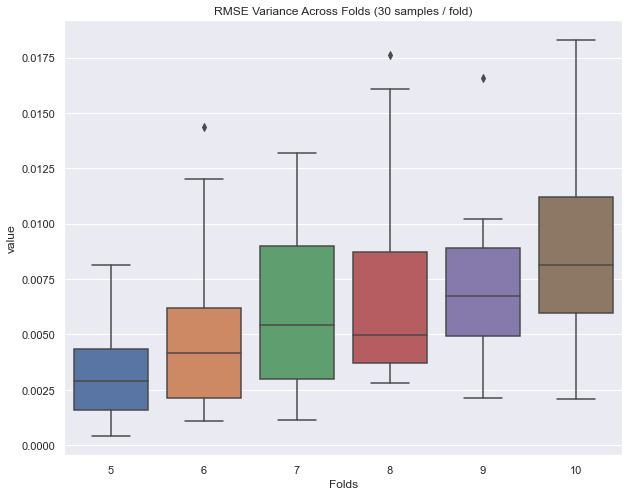

In [35]:
arr = np.array([[i.var() for i in arr] for arr in r2_arr])
df = pd.DataFrame(arr.T)
df.columns = folds
df = pd.melt(df, value_vars=folds, var_name="Folds")

# Plot Values
plt.figure(figsize=(10,8))
ax = plt.gca()
sns.boxplot(
    data=df,
    x="Folds",
    y="value", 
    ax=ax
)
plt.title("RMSE Variance Across Folds (30 samples / fold)")
plt.show()

In [36]:
f_oneway(*arr)
# perform Tukey's test
tukey = pairwise_tukeyhsd(endog=df['value'], groups=df['Folds'], alpha=0.05)
print(tukey)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     5      6   0.0016  0.444 -0.0009 0.0041  False
     5      7   0.0028 0.0171  0.0003 0.0054   True
     5      8   0.0035 0.0015  0.0009  0.006   True
     5      9   0.0037  0.001  0.0012 0.0063   True
     5     10   0.0056  0.001  0.0031 0.0081   True
     6      7   0.0012 0.6949 -0.0013 0.0038  False
     6      8   0.0019 0.2844 -0.0007 0.0044  False
     6      9   0.0021 0.1512 -0.0004 0.0047  False
     6     10    0.004  0.001  0.0014 0.0065   True
     7      8   0.0006    0.9 -0.0019 0.0031  False
     7      9   0.0009    0.9 -0.0016 0.0034  False
     7     10   0.0027 0.0258  0.0002 0.0053   True
     8      9   0.0003    0.9 -0.0022 0.0028  False
     8     10   0.0021 0.1587 -0.0004 0.0046  False
     9     10   0.0018 0.2957 -0.0007 0.0044  False
---------------------------------------------------


### Analysis

* The variance of RMSE increases as the number of folds increase
* This is expected as we have more samples of RMSE due to the increasing number of folds.
* The increase is statistically significant @ 5% till fold 8

# KNN Practice

In [37]:
# Read the iris data into a DataFrame

col_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
df_iris = pd.read_csv("../data/iris.data", header=1, names=col_names)

In [38]:
df_iris.head()

# Increase the default figure and font sizes for easier viewing
plt.rcParams['figure.figsize'] = (6, 4)
plt.rcParams['font.size'] = 14

In [39]:
# Create a custom colormap
from matplotlib.colors import ListedColormap

cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

In [40]:
# Map each iris species to a number
# Let's use Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2 and create a column called 'species_num'

df_iris["species_num"] = df_iris.species.map({"Iris-setosa":0,"Iris-versicolor":1,"Iris-virginica":2})

In [41]:
df_iris.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species,species_num
0,4.9,3.0,1.4,0.2,Iris-setosa,0
1,4.7,3.2,1.3,0.2,Iris-setosa,0
2,4.6,3.1,1.5,0.2,Iris-setosa,0
3,5.0,3.6,1.4,0.2,Iris-setosa,0
4,5.4,3.9,1.7,0.4,Iris-setosa,0


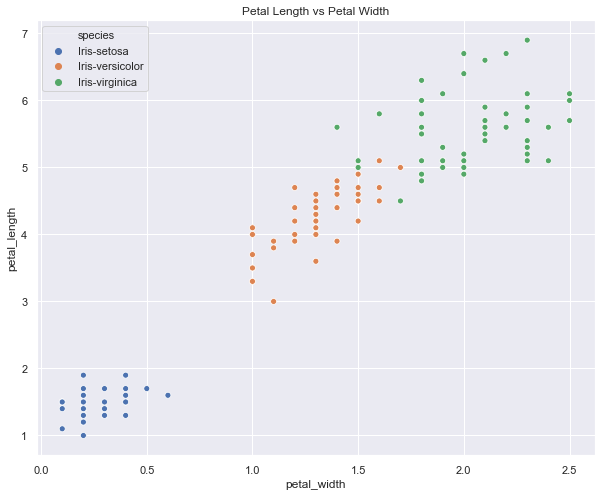

In [42]:
# Create a scatterplot of PETAL LENGTH versus PETAL WIDTH and color by SPECIES
plt.figure(figsize=(10,8))
ax = plt.gca()
sns.scatterplot(
    data=df_iris,
    x="petal_width",
    y="petal_length", 
    hue="species",
    ax=ax
)
plt.title("Petal Length vs Petal Width")
plt.show()

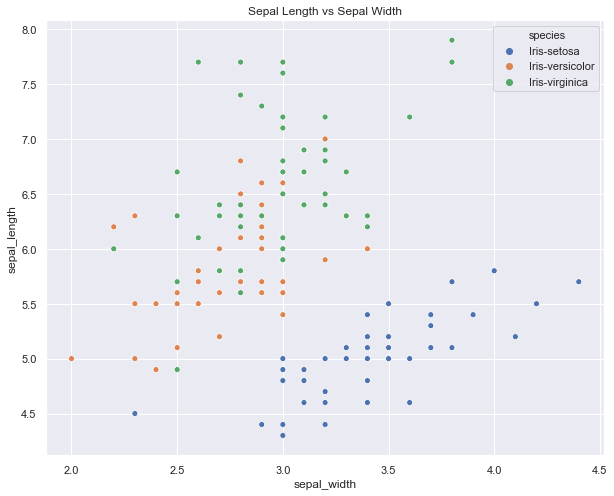

In [43]:
# Create a scatterplot of SEPAL LENGTH versus SEPAL WIDTH and color by SPECIES
plt.figure(figsize=(10,8))
ax = plt.gca()
sns.scatterplot(
    data=df_iris,
    x="sepal_width",
    y="sepal_length", 
    hue="species",
    ax=ax
)
plt.title("Sepal Length vs Sepal Width")
plt.show()

## KNN Classification of the Iris Dataset

### Create your feature matrix "X"
This will be all species measurements (sepal length, petal width, etc...)

In [44]:
# Create feature matrix (X).
feature_cols = ["sepal_length","sepal_width","petal_length","petal_width"]
X = df_iris[feature_cols].values

### Create your target vector "y"
This will be the species type.

In [45]:
# Create response vector (y).
y = df_iris.species_num.values

### Make Use of Train-Test-Split
Split your data in to train and test sets.

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

### Import KNN From `scikit-learn` and Instatiate a Model With One Neighbor

In [47]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

### Check the Accuracy
Train your model using the training set then use the test set to determine the accuracy

In [48]:
y_pred = knn.predict(X_test)
print((accuracy_score(y_test, y_pred)))

0.9111111111111111


### Create a Model With Five Neighbors. Did it Improve?

In [49]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
print((accuracy_score(y_test, y_pred)))

0.9555555555555556


Yes, there is an improvement from 93% to 95% roughly

### Create a Looped Function That Will Check All Levels of Various Neighbors and Calculate the Accuracy

In [50]:
accuracy_scores = []
neighbours_arr = np.arange(1,21)
for neighbour_count in neighbours_arr:
    knn = KNeighborsClassifier(n_neighbors=neighbour_count)
    knn.fit(X_train, y_train)

    y_pred = knn.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test, y_pred))

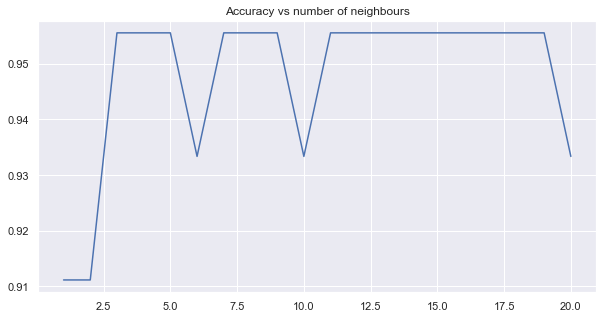

In [51]:
plt.figure(figsize=(10,5))
ax = plt.gca()
sns.lineplot(
    data=df_iris,
    x=neighbours_arr,
    y=accuracy_scores, 
    ax=ax
)
plt.title("Accuracy vs number of neighbours")
plt.show()

### Analysis
* Most of the improvement comes right after increasing the nearest neighbour to ~3
* After that there is no longer any significant improvement

### Bonus: According to `scikit-learn` Documentation, What is `knn.predict_proba(X_new)` Going to Do?

predict_proba predicts the probability of each class in X based on the surrounding neighbours.

For example if the nearest neighbour is set to 5 and there is one neighbour of class A in the nearest 5 neighbours then the P(A) = 1/5 = 20%

## Enrichment
_Everything beyond this point is enrichment and examples using Statsmodels for linear regression._

### Example: Using the Statsmodels Formula

Adapt the formula example using your metrics. We will review this implementation in class. Here is a reference to consider. The workflow is the same, but the syntax is a little different. We want to get accustomed to the formula syntax because we will be using them a lot more with regressions. The results should be comparable to scikit-learn's regression models.

In [52]:
# First, format our data in a DataFrame
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['MEDV'] = boston.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [53]:
# Set up our new statsmodel.formula handling model
import statsmodels.formula.api as smf

# You can easily swap these out to test multiple versions/different formulas
formulas = {
    "case1": "MEDV ~ RM + LSTAT + RAD + TAX + NOX + INDUS + CRIM + ZN - 1", # - 1 = remove intercept
    "case2": "MEDV ~ NOX + RM",
    "case3": "MEDV ~ RAD + TAX"
}

model = smf.ols(formula=formulas['case1'], data=df)
result = model.fit()

result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   MEDV   R-squared (uncentered):                   0.951
Model:                            OLS   Adj. R-squared (uncentered):              0.951
Method:                 Least Squares   F-statistic:                              1221.
Date:                Tue, 29 Nov 2022   Prob (F-statistic):                   1.38e-321
Time:                        19:14:11   Log-Likelihood:                         -1567.5
No. Observations:                 506   AIC:                                      3151.
Df Residuals:                     498   BIC:                                      3185.
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
RM             4.9729      0.224     22.195      0.000       4.533       5.413
LSTAT         -0.5606      0.048    -11.795      0.000      -0.654      -0.467
RAD            0.2128      0.070      3.050      0.002       0.076       0.350
TAX           -0.0174      0.004     -4.272      0.000      -0.025      -0.009
NOX            4.3448      3.384      1.284      0.200      -2.304      10.994
INDUS          0.0924      0.067      1.383      0.167      -0.039       0.224
CRIM          -0.0891      0.037     -2.423      0.016      -0.161      -0.017
ZN             0.0288      0.013      2.220      0.027       0.003       0.054
==============================================================================
Omnibus:                      192.139   Durbin-Watson:                   0.812
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              832.155
Skew:                           1.666   Prob(JB):                    1.99e-181
Kurtosis:                       8.326   Cond. No.                     6.24e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.24e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Bonus Challenge #1:

Can you optimize your R2, selecting the best features and using either test-train split or k-folds?

### Analysis
* F-Test shows that we can reject the hypothesis that all coefficients are 0 @ 2.5%
* @ 2.5% significance (two-headed), we cannot reject H0 that the coefficient is 0 for the following variables: NOX, INDUS, ZN
* Hence, exclude NOX, INDUS and ZN from the linear regression
* Use a train test split of 30%

In [54]:
import statsmodels.api as sm
from functools import reduce

### Procedure
* Do a 3 way split into training, validation and test dataset
* Train using the training dataset
* Compute AIC using the validation dataset (Idea from [https://towardsdatascience.com/introduction-to-aic-akaike-information-criterion-9c9ba1c96ced])
* Perform stepwise forward selection
* Choose the model with the lowest AIC

In [57]:
# Perform a train test split first
df_train_val, df_test = train_test_split(df,test_size = 0.2, random_state = 101)
df_train, df_val = train_test_split(df_train_val,test_size = 0.125, random_state = 101)

prediction_columns = ["RM","LSTAT","RAD","TAX","CRIM","NOX","INDUS","ZN"]
selected_predictors = []
predictors_arr = []
aic_values = []
r2_values = []

# We perform forward stepwise selection
for num_predictors in range(1, len(prediction_columns)+1):
    print(f"Running {num_predictors} predictors")
    
    selected_predictor = None
    r_square_max = 0
    aic = 0
    
    # Start off with one predictor
    for predictor in prediction_columns:
        
        # Select previously selected predictors + current predictor
        X_train = df_train[selected_predictors + [predictor]].values
        X_val = df_val[selected_predictors + [predictor]].values

        y_train = df_train.MEDV.values
        y_val = df_val.MEDV.values
    
        # Perform OLS
        model = sm.OLS(y_train, X_train).fit()
        
        y_pred = model.predict(X_val)
        
        # Compute metrics
        r2 = r2_score(y_val, y_pred)
        
        # Get Validation AIC
        if r2 > r_square_max:
            r_square_max = r2
            aic = n * np.log(mean_squared_error(y_val, y_pred)) + 2 * (len(selected_predictors) + 1)
            selected_predictor = predictor

    # Append results
    selected_predictors.append(selected_predictor)
    predictors_arr.append([*selected_predictors])
    aic_values.append(aic)
    r2_values.append(r2)
    
    print(f"Chosen predictors: {selected_predictors}")
    print(f"AIC: {aic:.2f}")
    print(f"R2: {r_square_max:.3f}")
    print("")

Running 1 predictors
Chosen predictors: ['RM']
AIC: 110.31
R2: 0.276

Running 2 predictors
Chosen predictors: ['RM', 'LSTAT']
AIC: 99.71
R2: 0.531

Running 3 predictors
Chosen predictors: ['RM', 'LSTAT', 'TAX']
AIC: 100.58
R2: 0.549

Running 4 predictors
Chosen predictors: ['RM', 'LSTAT', 'TAX', 'RAD']
AIC: 102.23
R2: 0.554

Running 5 predictors
Chosen predictors: ['RM', 'LSTAT', 'TAX', 'RAD', 'TAX']
AIC: 104.23
R2: 0.554

Running 6 predictors
Chosen predictors: ['RM', 'LSTAT', 'TAX', 'RAD', 'TAX', 'RAD']
AIC: 106.23
R2: 0.554

Running 7 predictors
Chosen predictors: ['RM', 'LSTAT', 'TAX', 'RAD', 'TAX', 'RAD', 'TAX']
AIC: 108.23
R2: 0.554

Running 8 predictors
Chosen predictors: ['RM', 'LSTAT', 'TAX', 'RAD', 'TAX', 'RAD', 'TAX', 'RAD']
AIC: 110.23
R2: 0.554



In [58]:
# Get the best model among all models
final_predictor_arr = predictors_arr[np.argmin(aic_values)]
final_predictor_arr

['RM', 'LSTAT']

In [59]:
# Train using the best model's predictors
X_train = df_train[final_predictor_arr].values
X_test = df_test[final_predictor_arr].values

y_train = df_train.MEDV.values
y_test = df_test.MEDV.values

# Perform OLS
model = sm.OLS(y_train, X_train).fit()

In [60]:
# Compute y_pred for the test data
y_pred_test = model.predict(X_test)

In [61]:
# Compute Test R2
r2_score(y_test, y_pred_test)

0.5995406738703449

### Analysis
* Test R2 is similar to the validation R2 for the model with only 2 predictors

### Bonus Challenge #2:

Given a combination of predictors, can you find another response variable that can be accurately predicted through the exploration of different predictors in this data set?

_Tip: Check out pairplots, coefficients, and Pearson scores._

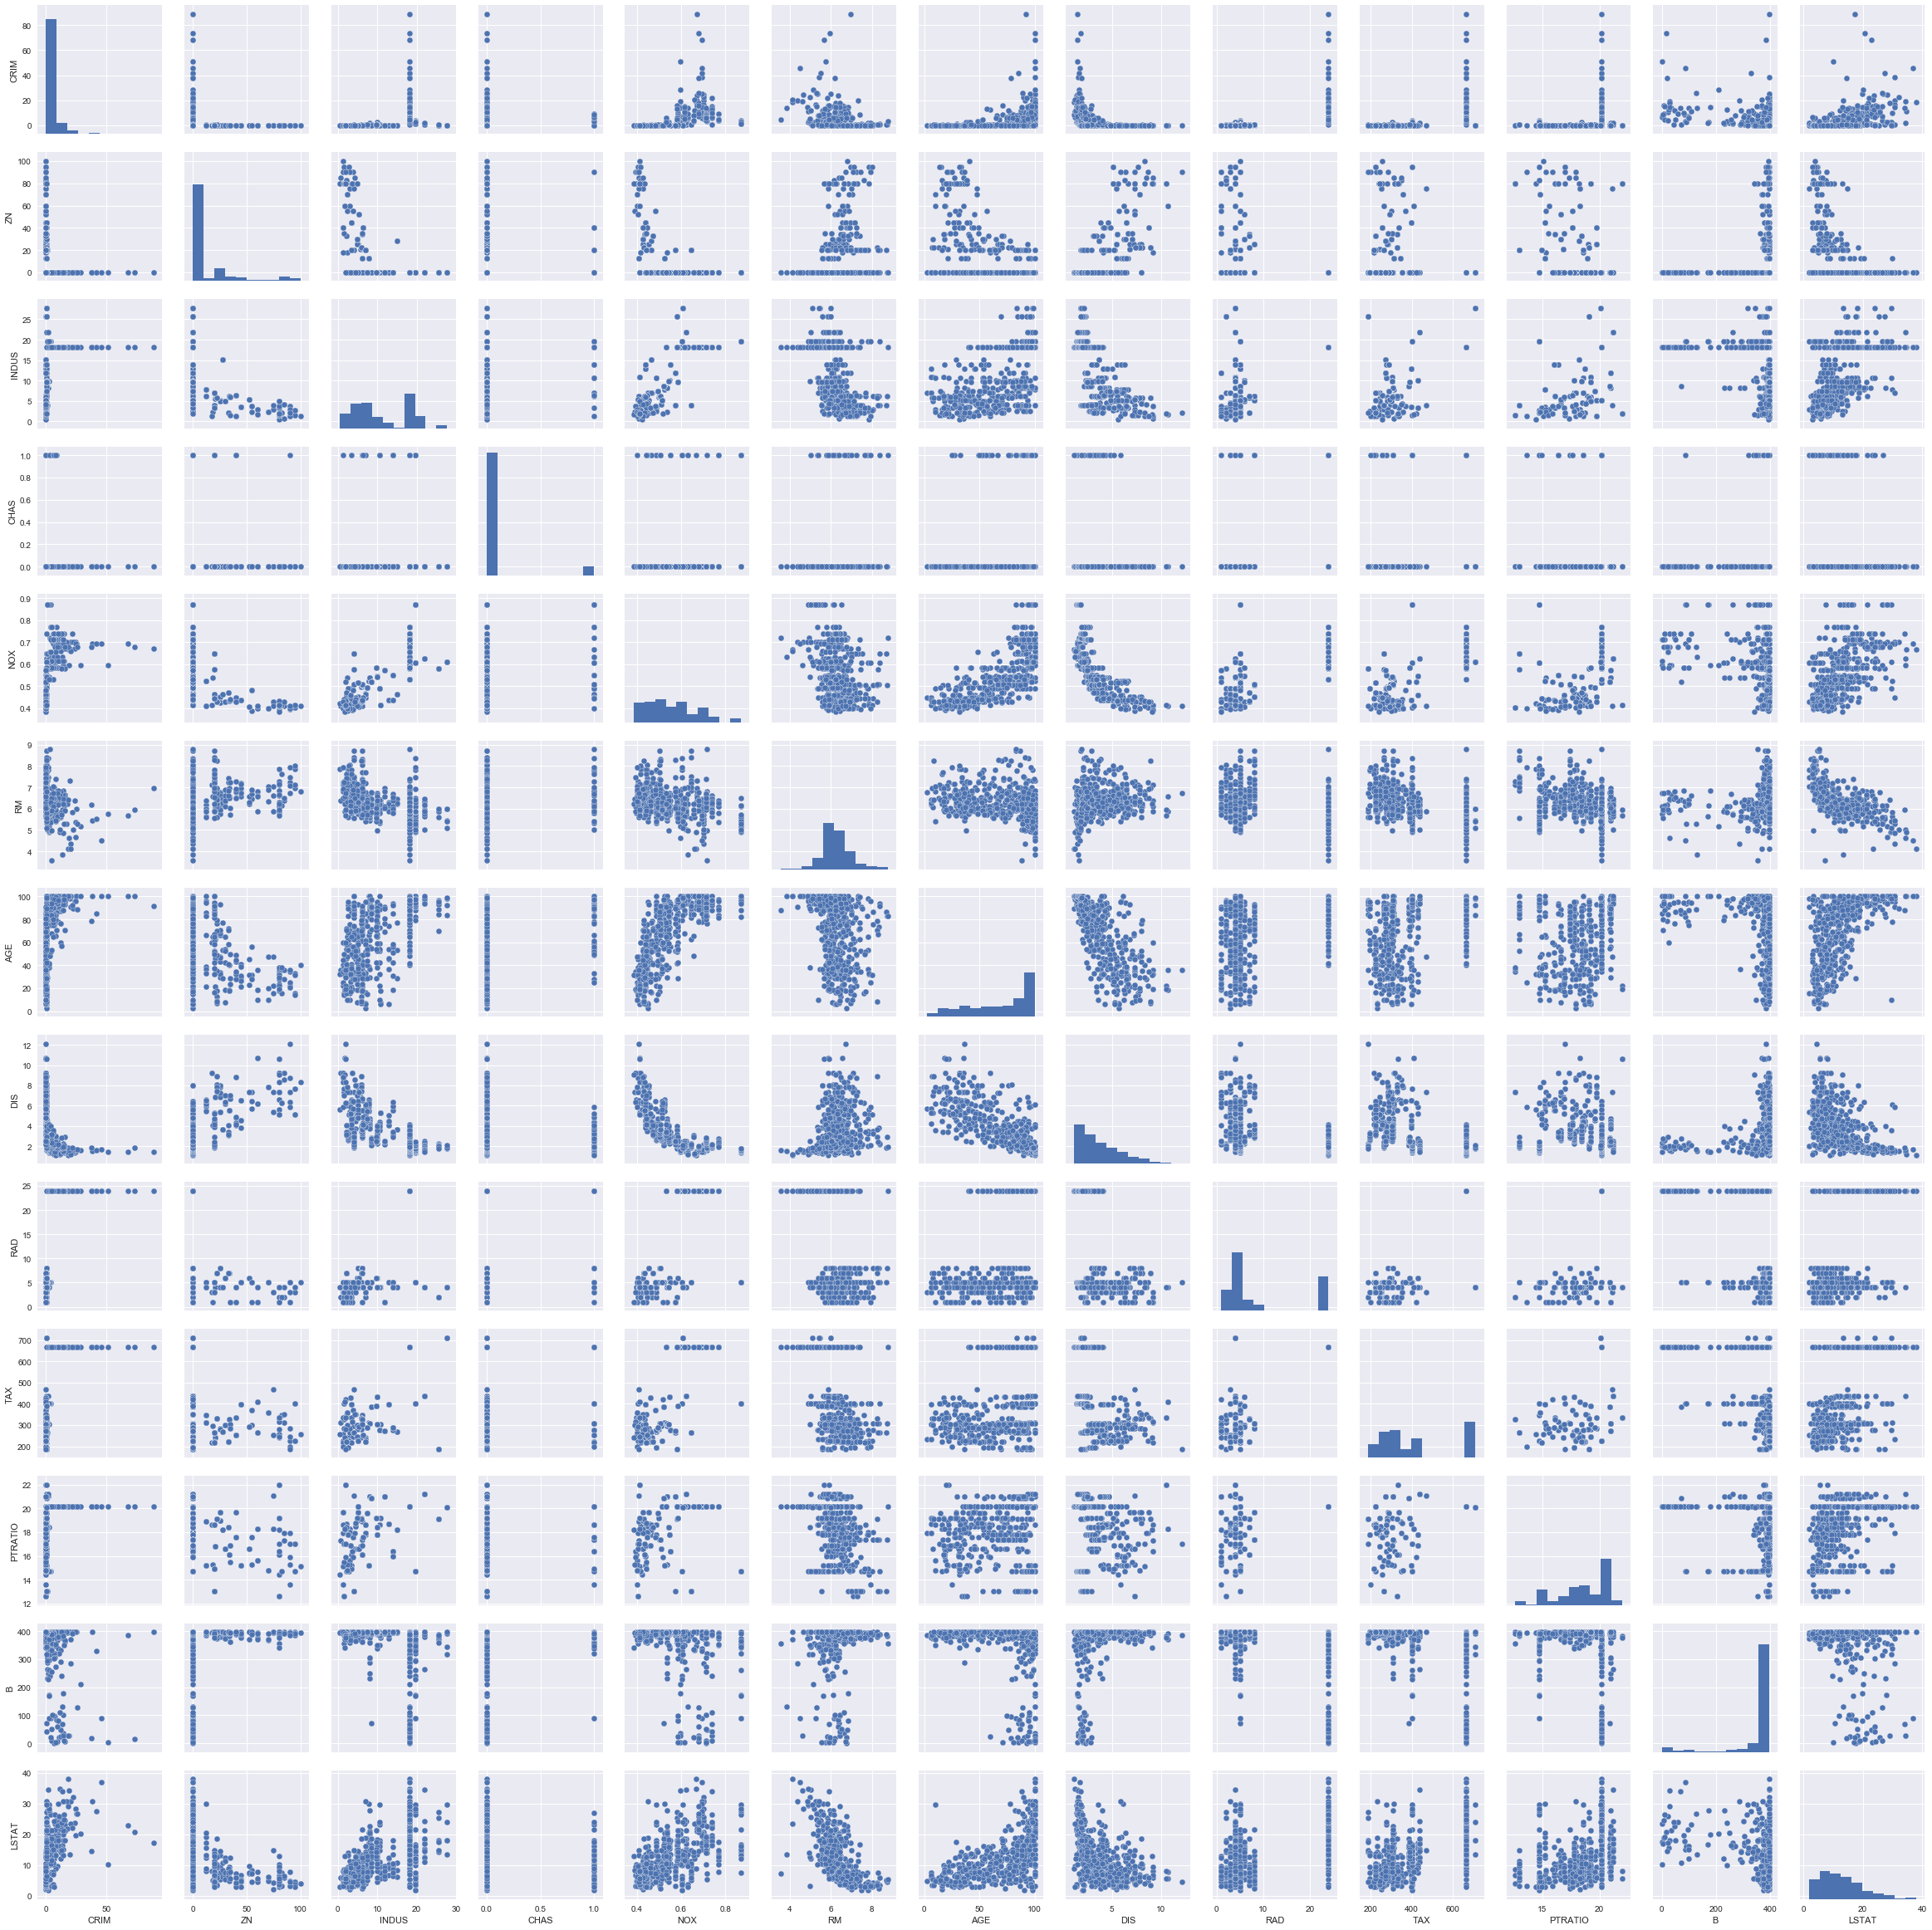

In [10]:
# Check out variable relations
import seaborn as sns

sns.pairplot(X);

In [ ]:
# Check out Pearson scores


## Demo: Patsy

In [11]:
import patsy

# Add response to the core DataFrame
df['MEDV'] = y

In [12]:
from sklearn.model_selection import train_test_split #If you didn't import it earlier, do so now

# Easily change your variable predictors without reslicing your DataFrame
y, X = patsy.dmatrices("MEDV ~ AGE + RM", data=df, return_type="dataframe")

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.7)


In [13]:
from sklearn import metrics
from sklearn.linear_model import LinearRegression

# Rerun your model, iteratively changing your variables and train_size from the previous cell

lm = LinearRegression()
model = lm.fit(X_train, y_train)

predictions = model.predict(X_test)
print("R^2 Score: {}".format(metrics.r2_score(y_test, predictions)))

R^2 Score: 0.5043486813354807
